In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df_audio_features_5000')
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [120]:

!pip install spotipy --upgrade
!pip install urllib3 --upgrade 



     -------------------------------------- 238.9/238.9 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 140.9/140.9 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.2 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [125]:
import spotipy

In [134]:
from spotipy.oauth2 import SpotifyClientCredentials


In [136]:
import client_id
import client_secret

In [137]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=client_id.client_id, 
    client_secret=client_secret.client_secret)) # 25b63863e2674da1a8a914ff62b53d04

In [8]:


df.columns = df.columns.str.strip() #if there are spaces in column names, they will be removes
df['name_art_id']=df['name']+df['artist']+df['id'] #adding new column
df.set_index('name_art_id', inplace=True) #new column will be an index
df.drop(columns=['name','artist','type', 'id', 'html', 'key', 'mode', 'duration_ms','time_signature'], inplace=True) #removing columns that are not necessary for clustering
df.dropna(axis=0, how='any', inplace=True) #removing raws with any null value

    
  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                      Gilberto Gil                                    1n7JnwviZ7zf0LR1tcGFq7  to Ravel: Boléro, M. 81                                                                                                                                                           Maurice Ravel                                   7E1ErYYCn0lYjHODZ1qGuB 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          5235 non-null   float64
 3   speechiness       5235 non-null   float64
 4   acousticness      5235 non-null   float64
 5   instrumentalness  5235 non-null   float64
 6   liveness          5235 non-nu

In [ ]:
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#IQR=q3-q1
#not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #table without ourliers if any exists

In [ ]:
#not_outliers.info()

In [10]:
from sklearn.preprocessing import MinMaxScaler
df_norm = MinMaxScaler().fit_transform(df) #normalization of the values in the tables
table_normalized=pd.DataFrame(df_norm, columns=df.columns, index=df.index)
    
table_normalized

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_art_id,,,,,,,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [40]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=3)

pca.fit(df_norm)
tab=pca.transform(df_norm) # transforming 9 columns into 3 meaningful columns, without losing too much data, but keeping sense
pca_table = pd.DataFrame(tab)
pca_table


,0,1,2
0,0.240558,-0.505039,-0.273882
1,-0.208316,-0.383904,0.091799
2,-0.328660,-0.471112,0.285064
3,0.383740,-0.816332,-0.078838
4,0.442607,-0.754764,-0.165603
...,...,...,...
5230,1.113407,-0.125915,-0.113825
5231,0.915734,-0.222037,-0.319475
5232,1.409961,0.002957,-0.024864
5233,1.039605,-0.226845,-0.276935


In [41]:
pca_table['ar_id']=df.index
pca_table = pca_table.set_index('ar_id')
pca_table

,0,1,2
ar_id,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.240558,-0.505039,-0.273882
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.208316,-0.383904,0.091799
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",-0.328660,-0.471112,0.285064
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.383740,-0.816332,-0.078838
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.442607,-0.754764,-0.165603
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",1.113407,-0.125915,-0.113825
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.915734,-0.222037,-0.319475
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",1.409961,0.002957,-0.024864


In [98]:
pca_table.drop(columns='cluster' , inplace=True)

In [65]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=17)
kmeans.fit(pca_table)
clusters = kmeans.predict(pca_table)

In [107]:

pca_table['cluster']=clusters

In [67]:
pca_tab5000_clus = pca_table.groupby(by='cluster').mean()

from sklearn.metrics import pairwise_distances
pca_tab_5000 = pd.DataFrame(pairwise_distances(pca_tab5000_clus), 
                   index=pca_tab5000_clus.index, 
                   columns=pca_tab5000_clus.index)

<AxesSubplot:xlabel='cluster', ylabel='cluster'>

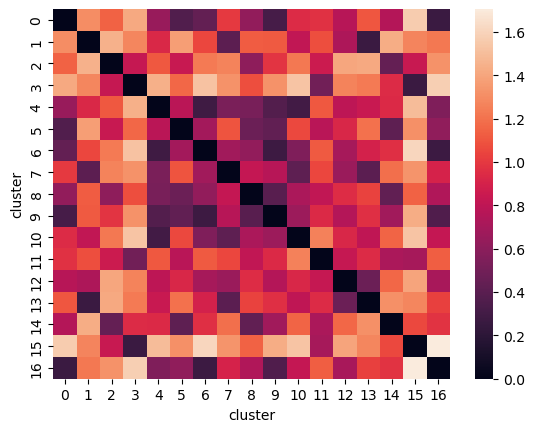

In [68]:
import seaborn as sns
sns.heatmap(pca_tab_5000)

In [106]:
pca_table.columns

Index(['pc1', 'pc2', 'pc3'], dtype='object')

In [100]:
songs_pca_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=pca_table.columns)
songs_pca_centroids


,pc1,pc2,pc3
0,-0.326616,-0.365858,0.213524
1,0.238201,0.799062,0.077294
2,0.621698,-0.511474,-0.411097
3,1.071350,-0.160987,0.193920
4,-0.283126,0.099489,-0.236396
5,-0.022325,-0.542894,0.121536
6,-0.426587,-0.005387,-0.013231
7,-0.013221,0.530969,-0.099893
8,0.091363,-0.269663,-0.242445
9,-0.231068,-0.203806,-0.036933


In [104]:

songs_rdy_centroids = songs_pca_centroids.reset_index().rename(columns={'index': 'cluster'}).rename(columns={'pc1':'0_centroid', 'pc2': '1_centroid', 'pc3': '2_centroid'})

# rename {col} to {col}_centroid
songs_rdy_centroids

,cluster,0_centroid,1_centroid,2_centroid
0,0,-0.326616,-0.365858,0.213524
1,1,0.238201,0.799062,0.077294
2,2,0.621698,-0.511474,-0.411097
3,3,1.071350,-0.160987,0.193920
4,4,-0.283126,0.099489,-0.236396
5,5,-0.022325,-0.542894,0.121536
6,6,-0.426587,-0.005387,-0.013231
7,7,-0.013221,0.530969,-0.099893
8,8,0.091363,-0.269663,-0.242445
9,9,-0.231068,-0.203806,-0.036933


In [108]:
songs_rdy_with_centroids = (
pca_table
.merge(songs_rdy_centroids, on='cluster', how='left')
)
songs_rdy_with_centroids['songs_name'] = pca_table.index
songs_rdy_with_centroids = songs_rdy_with_centroids.set_index('songs_name')
songs_rdy_with_centroids.head()

,pc1,pc2,pc3,cluster,0_centroid,1_centroid,2_centroid
songs_name,,,,,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.240558,-0.505039,-0.273882,14,0.309500,-0.615680,-0.114782
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.208316,-0.383904,0.091799,0,-0.326616,-0.365858,0.213524
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",-0.328660,-0.471112,0.285064,0,-0.326616,-0.365858,0.213524
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.383740,-0.816332,-0.078838,14,0.309500,-0.615680,-0.114782
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.442607,-0.754764,-0.165603,14,0.309500,-0.615680,-0.114782


In [110]:
songs = (
songs_rdy_with_centroids
    .assign(
        distance = lambda x: (x['pc1'] - x['0_centroid'])**2 + (x['pc2'] - x['1_centroid'])**2+(x['pc3'] - x['2_centroid'])
    )
    .groupby('cluster')
        # get top 5 songs with the smallest distance
    .apply(lambda x: x.nsmallest(25, 'distance'))
)

In [111]:
songs

pc1  \
cluster songs_name                                                     
0       Inglan Is A Bitch                              ... -0.238018   
        Why We Thugs                                   ... -0.226560   
        Hulapalu                                       ... -0.203259   
        I'm Outta Love - Radio Edit                    ... -0.251893   
        Engine 54                                      ... -0.203783   
...                                                              ...   
16      Cojela Que Va Sin Jockey                       ... -0.455366   
        Mi Fanatica                                    ... -0.447105   
        Lean Wit It, Rock Wit It                       ... -0.400591   
        Joyride                                        ... -0.475092   
        The Sun Stop Shining                           ... -0.386359   

                                                                 pc2  \
cluster songs_name                                                     
0       Inglan Is A Bitch                              ... -0.373840   
        Why We Thugs                                   ... -0.360008   
        Hulapalu                                       ... -0.383111   
        I'm Outta Love - Radio Edit                    ... -0.329621   
        Engine 54                                      ... -0.413885   
...                                                              ...   
16      Cojela Que Va Sin Jockey                       ... -0.145622   
        Mi Fanatica                                    ... -0.171523   
        Lean Wit It, Rock Wit It                       ... -0.221144   
        Joyride                                        ... -0.093795   
        The Sun Stop Shining                           ... -0.164355   

                                                                 pc3  cluster  \
cluster songs_name                                                              
0       Inglan Is A Bitch                              ...  0.067479        0   
        Why We Thugs                                   ...  0.070418        0   
        Hulapalu                                       ...  0.066722        0   
        I'm Outta Love - Radio Edit                    ...  0.078590        0   
        Engine 54                                      ...  0.071183        0   
...                                                              ...      ...   
16      Cojela Que Va Sin Jockey                       ...  0.082175       16   
        Mi Fanatica                                    ...  0.082285       16   
        Lean Wit It, Rock Wit It                       ...  0.072399       16   
        Joyride                                        ...  0.079842       16   
        The Sun Stop Shining                           ...  0.072773       16   

                                                            0_centroid  \
cluster songs_name                                                       
0       Inglan Is A Bitch                              ...   -0.326616   
        Why We Thugs                                   ...   -0.326616   
        Hulapalu                                       ...   -0.326616   
        I'm Outta Love - Radio Edit                    ...   -0.326616   
        Engine 54                                      ...   -0.326616   
...                                                                ...   
16      Cojela Que Va Sin Jockey                       ...   -0.504132   
        Mi Fanatica                                    ...   -0.504132   
        Lean Wit It, Rock Wit It                       ...   -0.504132   
        Joyride                                        ...   -0.504132   
        The Sun Stop Shining                           ...   -0.504132   

                                                            1_centroid  \
cluster songs_name                                                       
0       Inglan Is A Bitch 

In [131]:
songs_distant_in_cluster = (
songs_rdy_with_centroids
    .assign(
        distance = lambda x: (x['pc1'] - x['0_centroid'])**2 + (x['pc2'] - x['1_centroid'])**2+(x['pc3'] - x['2_centroid'])
    )
    .groupby('cluster')
        # get top 5 songs with the smallest distance
    .apply(lambda x: x.nlargest(25, 'distance'))
)

In [132]:
songs_distant_in_cluster.to_csv('songs_distant_in_cluster.csv')

In [130]:
songs.to_csv('songs')

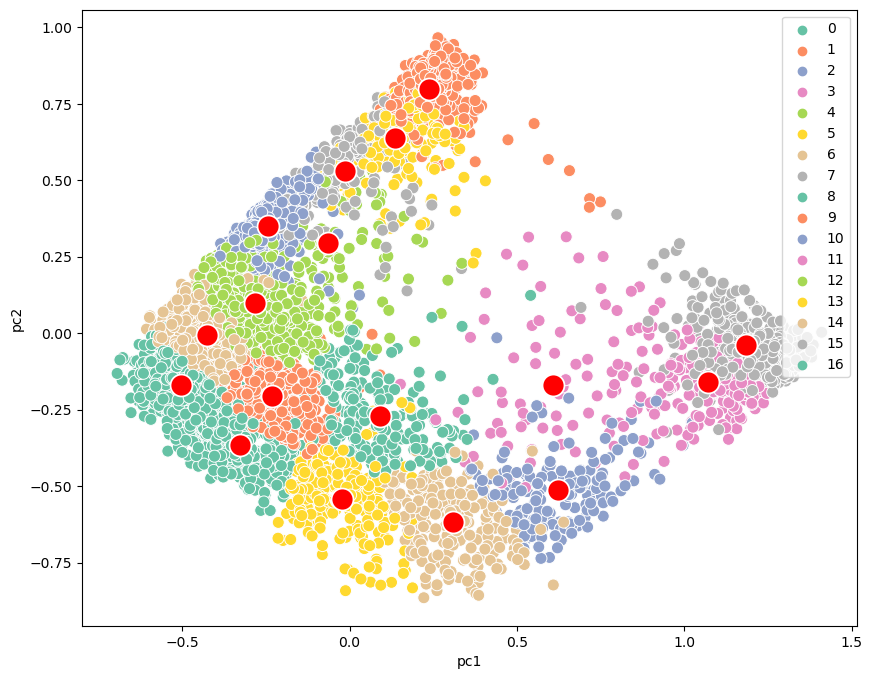

In [93]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['pc1','pc2','pc3']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(pca_table)
plot_data.columns = ['pc1','pc2','pc3']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='pc1', y='pc2', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='pc1', y='pc2', color='red', s=250)
plt.show()

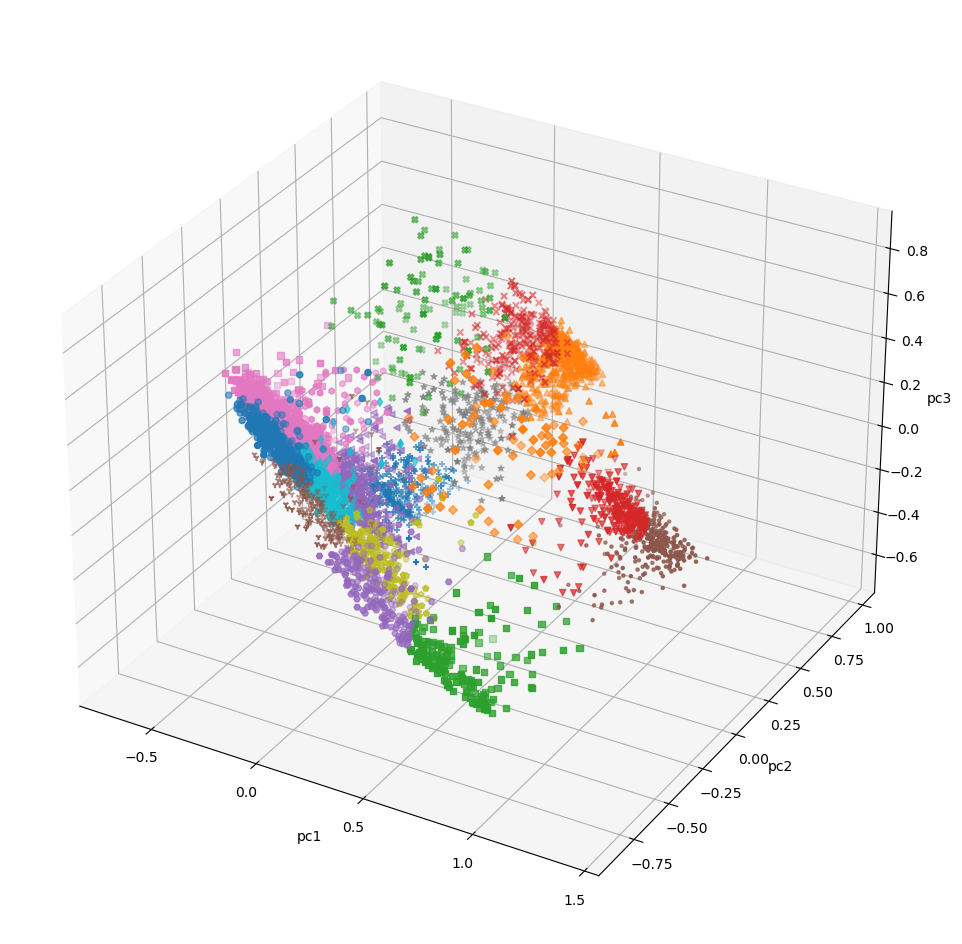

In [96]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b','m','c','y','k','w']
markers = ['o', '^','s',"v","<","1","h","*","p","d",'+',"D","X","x","H",".",","

,">","2","3","4","8"



]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['pc1'], d['pc2'], d['pc3'], marker=markers[marker], label=d['cluster'])

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

In [23]:
from sklearn.cluster import KMeans

def inertia(table): #calculation inertia
    inertia_list = []

    for i in range(5,30):
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(table)
        inertia_list.append(round(myKMeans.inertia_))
    return inertia_list

In [47]:
pca_tab_without_clus = pca_table.drop(columns='cluster')

In [25]:
pca_tab_without_clus = pca_table.copy()

In [26]:
pca_tab_without_clus

,0,1,2
ar_id,,,
Se Eu Quiser Falar Com Deus Gilberto Gil 1n7JnwviZ7zf0LR1tcGFq7,0.240558,-0.505039,-0.273882
Saudade De Bahia Antônio Carlos Jobim 5QGM1U0eCYrQuwSJwTm5Zq,-0.208316,-0.383904,0.091799
"Canta Canta, Minha Gente Martinho Da Vila 0NLIFSZxPzQhCwnkn5PJYs",-0.328660,-0.471112,0.285064
Mulher Eu Sei Chico César 3mXqOdlLE1k67WsAxryPFs,0.383740,-0.816332,-0.078838
Rosa Morena Kurt Elling 7bSzjzjTkWT2CkIPPdp0eA,0.442607,-0.754764,-0.165603
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 Pyotr Ilyich Tchaikovsky 1aEhYlZtypmipA06SDJ4U3",1.113407,-0.125915,-0.113825
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique Tristan Murail 1Gfqe7TAKklmuZf6hxsH6h",0.915734,-0.222037,-0.319475
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) Arnold Schoenberg 2XNwnFrdMDpismp0VUZ7cU",1.409961,0.002957,-0.024864


In [28]:
import seaborn as sns
def graph(inerdef):  #preparing graph based on inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 to 20 clusters')
    sns.lineplot(x=range(5, 30), y=inerdef, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [29]:
inertia(pca_tab_without_clus)

[395,
 335,
 293,
 262,
 239,
 218,
 200,
 184,
 172,
 163,
 154,
 146,
 138,
 133,
 127,
 121,
 116,
 113,
 107,
 104,
 102,
 98,
 95,
 93,
 90]

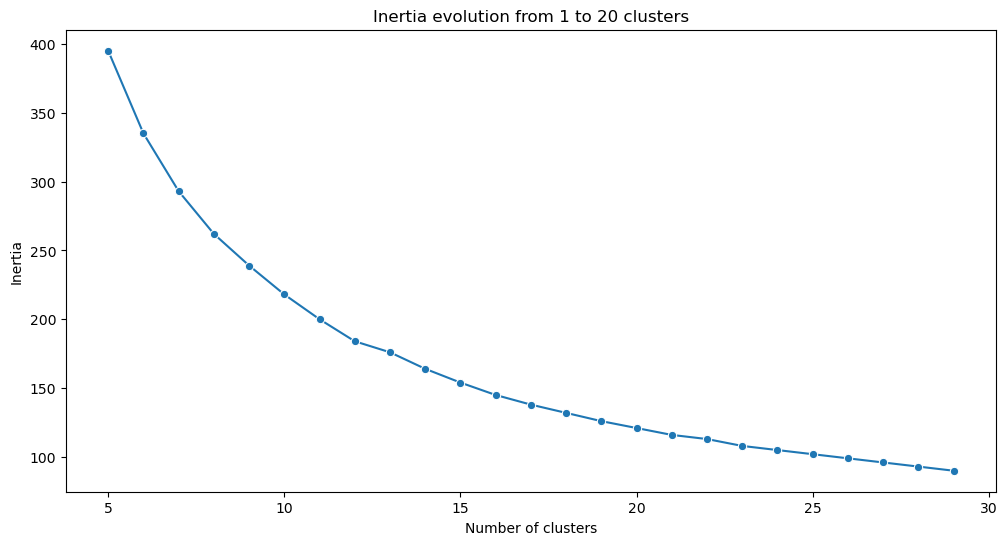

In [30]:
graph(inertia(pca_table))

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_tab_without_clus, kmeans.labels_)

NameError: name 'kmeans' is not defined

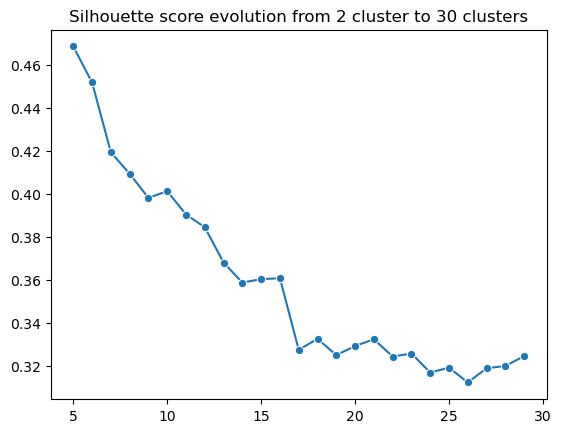

In [33]:
max_k = 30
sil_score = []


for k in range(5, max_k): 
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(pca_tab_without_clus).labels_
    sil_score.append(silhouette_score(pca_tab_without_clus, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(5, max_k), y=sil_score, marker='o')
plt.show()